The first 10 values of raw audio data :
[ 0.0000000e+00  0.0000000e+00  9.1552734e-05  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -9.1552734e-05
 -9.1552734e-05  0.0000000e+00]
The Dimensions of the Audio : 
(176400,)
Sample Rate : 44100
Dimensions of spectrogram:
(128, 345)
<class 'numpy.ndarray'>


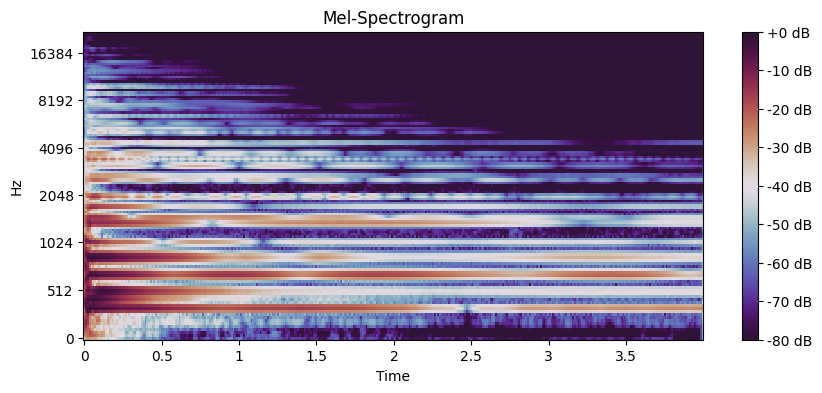

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import librosa

audio_file_path = './data/major/C_Major_v10_0.wav'

raw_data, sample_rate = librosa.load(audio_file_path, sr=None) 

print("The first 10 values of raw audio data :")
print(raw_data[:10])

print("The Dimensions of the Audio : ")
print(raw_data.shape)

print("Sample Rate : " + str(sample_rate))

# convert the data into spectrogram and then convert to decibels dB
spectrogram = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=128, fmax=8000)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

print("Dimensions of spectrogram:")
print(spectrogram_db.shape)
print(type(spectrogram_db))

plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel', sr=sample_rate, cmap="twilight_shifted")
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.show()



In [2]:
# PREPARING TRAINING DATA

from DataPreparation import prepare_dataset

train_data, train_labels, val_data, val_labels, test_data, test_labels = prepare_dataset('./data')

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
val_labels = label_encoder.fit_transform(val_labels)
test_labels = label_encoder.fit_transform(test_labels)


In [3]:
print("Values of Training Data:")
print(train_data[0])

print("Shape of Datasets:")
print(f"Train:", train_data.shape)
print(f"Validation:", val_data.shape)
print(f"Test:", test_data.shape)

Values of Training Data:
[[0.47098827 0.56707615 0.6024293  ... 0.         0.         0.        ]
 [0.5714606  0.6352657  0.6452068  ... 0.         0.         0.        ]
 [0.6120392  0.64300174 0.53668976 ... 0.         0.         0.        ]
 ...
 [0.06827231 0.18590012 0.2315116  ... 0.         0.         0.        ]
 [0.11137438 0.21343604 0.24775505 ... 0.         0.         0.        ]
 [0.14397088 0.2630376  0.29974467 ... 0.         0.         0.        ]]
Shape of Datasets:
Train: (3672, 128, 173)
Validation: (459, 128, 173)
Test: (459, 128, 173)


In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from Model import create_cnn_model 

model = create_cnn_model(train_data)
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, epochs=20, batch_size=32, verbose=1, validation_data=(val_data, val_labels))

c:\Users\Chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.5009 - loss: 0.7137 - val_accuracy: 0.5011 - val_loss: 0.6931
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.5012 - loss: 0.6931 - val_accuracy: 0.5011 - val_loss: 0.6931
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.5039 - loss: 0.6934 - val_accuracy: 0.5011 - val_loss: 0.6931
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.4872 - loss: 0.6935 - val_accuracy: 0.5098 - val_loss: 0.6919
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.5528 - loss: 0.6729 - val_accuracy: 0.6667 - val_loss: 0.5512
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.7537 - loss: 0.4491 - val_accuracy: 0.8301 - val_loss: 0.3046
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.8582 - loss: 0.2696 - val_accuracy: 0.8257 - val_loss: 0.3071
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.9126 - loss: 0.1930 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 171, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 83, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 41, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 39, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 34048)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,358,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,353,221 (50.94 MB)

 Trainable params: 4,451,073 (16.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,902,148 (33.96 MB)

15/15 - 0s - 25ms/step - accuracy: 0.9913 - loss: 0.0133


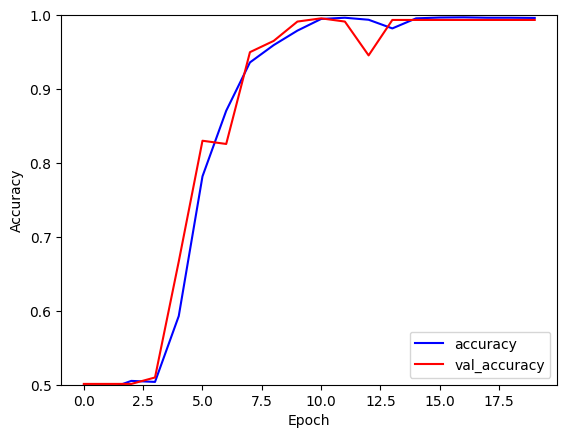

In [5]:
model.summary()
plt.plot(history.history['accuracy'], label='accuracy', color="blue")
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', color="red")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)

In [ ]:
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)  
y_true = np.array(test_labels)  
conf_matrix = tf.math.confusion_matrix(y_true, y_pred_classes)
print(conf_matrix.numpy())


NameError: name 'model' is not defined